#Q1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
Ans->

Anomaly Detection is the process of identifying data points or patterns that significantly deviate from normal behavior in a dataset. These unusual observations are called anomalies or outliers and often indicate errors, fraud, failures, or rare events.

Types of Anomalies:
| Type                   | Description                                                          | Example                                                                   |
| ---------------------- | -------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| **Point Anomaly**      | A single data point that is abnormal compared to others              | A credit card transaction of ₹5,00,000 when usual transactions are ₹2,000 |
| **Contextual Anomaly** | An anomaly valid only in a specific context (time, season, location) | High electricity usage at midnight                                        |
| **Collective Anomaly** | A group of data points that together form an anomaly                 | Continuous abnormal network traffic indicating a cyber attack             |

#Q2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
Ans->
| Algorithm            | Approach                               | Strengths                           | Use Cases                          |
| -------------------- | -------------------------------------- | ----------------------------------- | ---------------------------------- |
| **Isolation Forest** | Isolates anomalies using random splits | Fast, works well for large datasets | Fraud detection, sensor monitoring |
| **DBSCAN**           | Density-based clustering               | Detects clusters of arbitrary shape | Spatial data, GPS data             |
| **LOF**              | Compares local density of points       | Detects local anomalies             | Network intrusion, medical data    |

#Q3. What are the key components of a Time Series?
Answer:The key components of a time series are:

1. Trend:

Explanation: The long-term movement or direction of the data over a broad period (increasing, decreasing, or stable).

Example: The steady increase in the global population over the last 50 years.

2. Seasonality:

Explanation: Regular, repeating fluctuations that occur over a fixed period (e.g., daily, weekly, monthly, or yearly) due to calendar or climate factors.

Example: Retail sales spiking every December due to holiday shopping.

3. Cyclical:

Explanation: Long-term oscillations or waves that occur over irregular intervals, often tied to economic or business cycles.

Example: The rise and fall of housing prices during economic expansions and recessions (spanning several years).

4. Irregular (Residual/Noise):

Explanation: Random, unpredictable fluctuations in the data that are not explained by trend, seasonality, or cycles.

Example: A sudden drop in airline traffic due to a volcanic eruption or a pandemic lockdown.

#Q4. Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
Answer:

Stationarity:A time series is considered stationary if its statistical properties—specifically its mean, variance, and autocovariance—remain constant over time. This means the series has no predictable pattern (like trend or seasonality) in the long run, making it easier to model.

🔹How to Test for Stationarity:

1. Visual Test: Plotting the data to see if the mean and variance appear constant.

2. Statistical Test: Using the Augmented Dickey-Fuller (ADF) test.

●Null Hypothesis ($H_0$): The series is non-stationary.

●Result: If the p-value is $< 0.05$, we reject $H_0$ and conclude the series is stationary.

🔹How to Transform Non-Stationary to Stationary:

1. Differencing: Subtracting the current value from the previous value ($y_t - y_{t-1}$) helps remove trends.

2. Log Transformation: Taking the log of the values ($log(y_t)$) stabilizes variance, especially if the trend is exponential.

3. Seasonal Differencing: Subtracting the value from the same season in the previous cycle (e.g., $y_t - y_{t-12}$ for monthly data) to remove seasonality.

#Q5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application?
Ans->

Time series forecasting models differ based on how they use past values, errors, seasonality, and external factors. The key differences are explained below:
| **Model**   | **Full Form**                            | **Structure**                         | **Key Characteristics**                                | **Applications / Use Cases**              |
| ----------- | ---------------------------------------- | ------------------------------------- | ------------------------------------------------------ | ----------------------------------------- |
| **AR**      | Autoregressive                           | Uses past values of the series itself | Forecast depends on previous observations (lags)       | Stock prices, temperature forecasting     |
| **MA**      | Moving Average                           | Uses past forecast errors             | Smooths noise using past error terms                   | Noise reduction, short-term forecasts     |
| **ARIMA**   | Autoregressive Integrated Moving Average | AR + MA + Differencing (p, d, q)      | Handles non-stationary data through differencing       | Sales forecasting, economic indicators    |
| **SARIMA**  | Seasonal ARIMA                           | ARIMA + seasonal terms (P, D, Q, s)   | Captures repeating seasonal patterns                   | Monthly airline passengers, retail demand |
| **SARIMAX** | Seasonal ARIMA with Exogenous Variables  | SARIMA + external variables (X)       | Uses additional predictors such as weather or holidays | Energy demand, traffic forecasting        |

🔹Summary:

●AR models rely only on past values.

●MA models rely on past errors.

●ARIMA combines AR and MA and handles non-stationarity.

●SARIMA adds seasonality handling.

●SARIMAX further enhances SARIMA by including external influencing factors.

This progression makes SARIMAX the most powerful and flexible model for real-world time series problems involving seasonality and external variables.

#Q6. Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.
Ans->

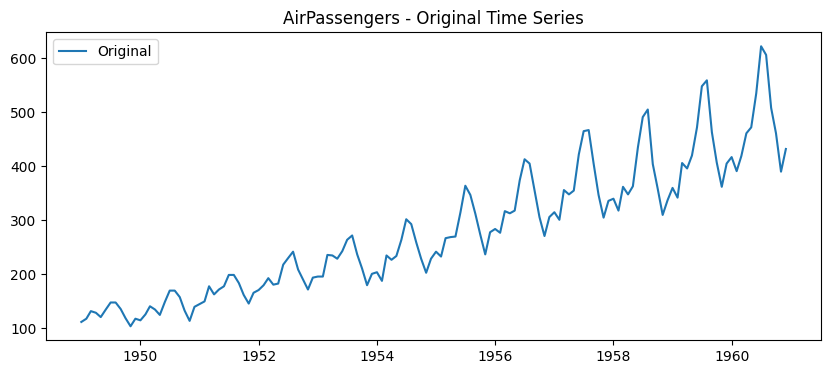

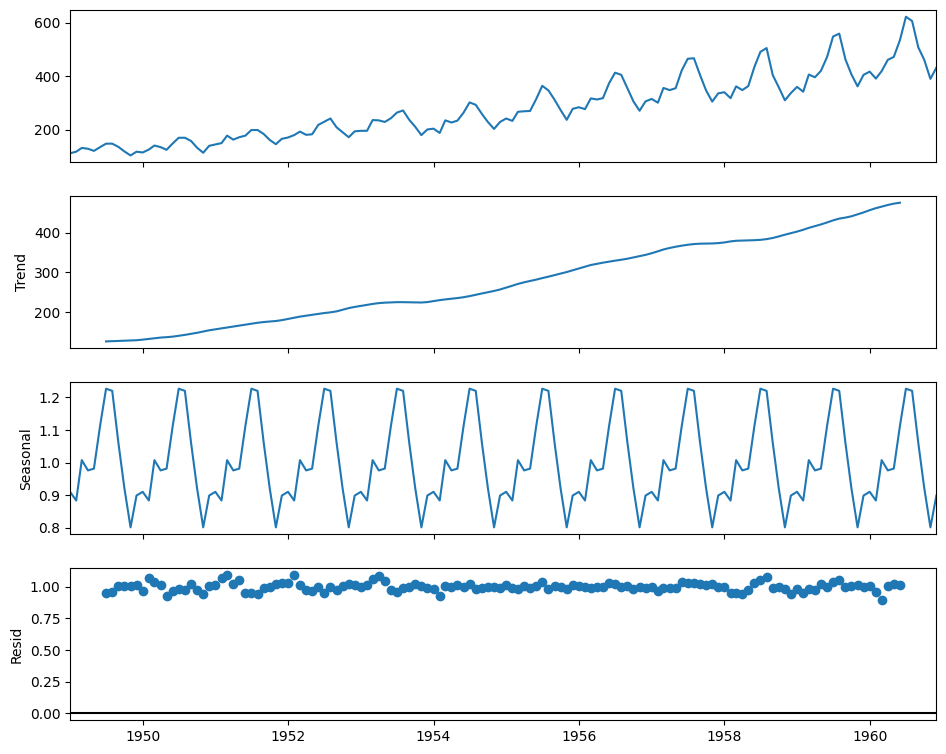

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load Dataset (Using a URL or local file for AirPassengers)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# 2. Plot Original Series
plt.figure(figsize=(10, 4))
plt.plot(df, label='Original')
plt.title('AirPassengers - Original Time Series')
plt.legend()
plt.show()

# 3. Decompose into Trend, Seasonality, and Residuals
# 'multiplicative' is often used for this dataset as amplitude increases over time
result = seasonal_decompose(df, model='multiplicative')

# Plot the decomposition
fig = result.plot()
fig.set_size_inches(10, 8)
plt.show()

#Q7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies.Visualize the anomalies on a 2D scatter plot.
Ans->

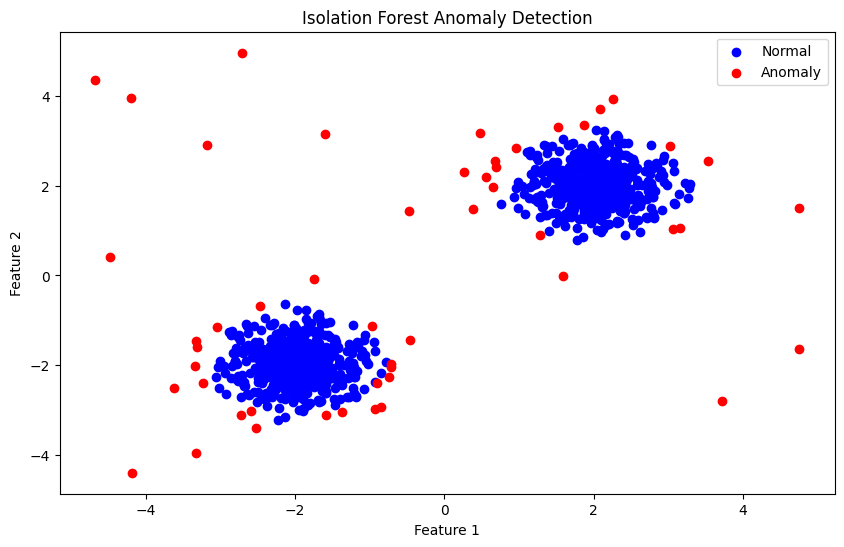

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Simulate/Load Data (Using a sample structure similar to Taxi Fare)
# Creating synthetic data for demonstration: distance vs fare
np.random.seed(42)
n_points = 500
X = 0.5 * np.random.randn(n_points, 2)
X = np.r_[X + 2, X - 2] # Generate clusters
# Add some outliers
X_outliers = np.random.uniform(low=-5, high=5, size=(20, 2))
X_data = np.r_[X, X_outliers]

df = pd.DataFrame(X_data, columns=['feature1', 'feature2'])

# 2. Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df[['feature1', 'feature2']])
# -1 indicates anomaly, 1 indicates normal

# 3. Visualize
plt.figure(figsize=(10, 6))
# Plot normal points
plt.scatter(df[df['anomaly'] == 1]['feature1'],
            df[df['anomaly'] == 1]['feature2'],
            c='blue', label='Normal')
# Plot anomalies
plt.scatter(df[df['anomaly'] == -1]['feature1'],
            df[df['anomaly'] == -1]['feature2'],
            c='red', label='Anomaly')

plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#Q8. Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results.
Ans->

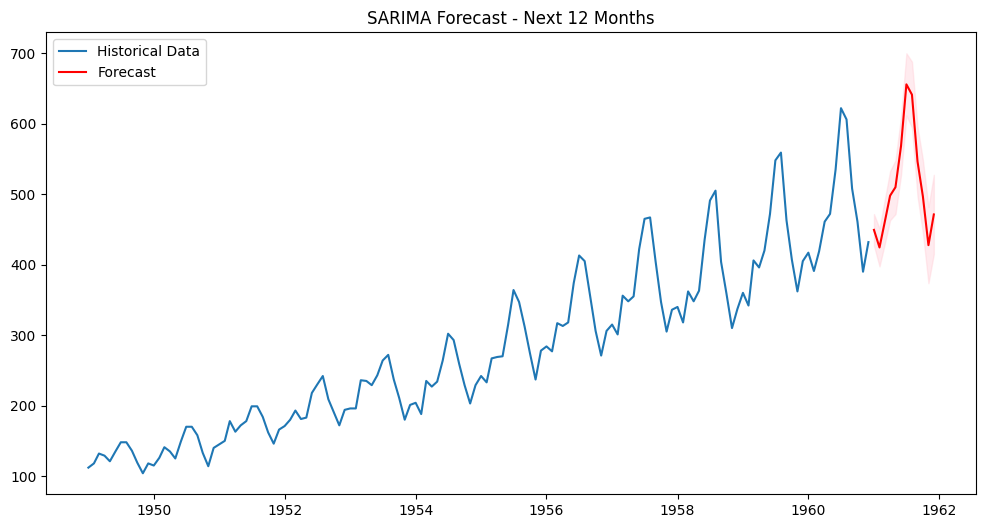

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Load Data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.index.freq = 'MS' # Set frequency to Month Start

# 2. Train SARIMA Model
# Order (p,d,q) and Seasonal Order (P,D,Q,s)
# These parameters are typically found via grid search or ACF/PACF analysis.
# Using standard parameters for this dataset example: (1, 1, 1) x (1, 1, 1, 12)
model = SARIMAX(df['Passengers'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# 3. Forecast Next 12 Months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1], periods=13, freq='MS')[1:]
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# 4. Visualize
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Historical Data')
plt.plot(forecast_index, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast - Next 12 Months')
plt.legend()
plt.show()

#Q9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
Ans->

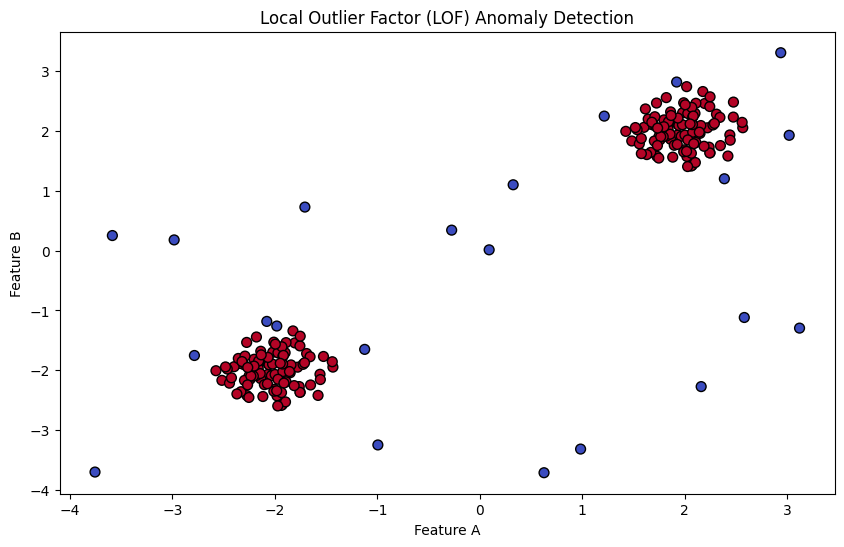

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# 1. Generate Synthetic Data
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2] # Two clusters
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# 2. Apply Local Outlier Factor
# n_neighbors is a key parameter
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)
# y_pred: 1 for inliers, -1 for outliers

# 3. Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=50)
plt.title('Local Outlier Factor (LOF) Anomaly Detection')
plt.xlabel('Feature A')
plt.ylabel('Feature B')
# Red points (-1) are anomalies, Blue points (1) are normal
plt.show()

#Question 10: You are working as a data scientist for a power grid monitoring company.Your goal is to forecast energy demand and also detect abnormal spikes or drops inreal-time consumption data collected every 15 minutes. The dataset includes featureslike timestamp, region, weather conditions, and energy usage.
#Explain your real-time data science workflow:
#● How would you detect anomalies in this streaming data (Isolation Forest / LOF /DBSCAN)?
#● Which time series model would you use for short-term forecasting (ARIMA /SARIMA / SARIMAX)?
#● How would you validate and monitor the performance over time?
#● How would this solution help business decisions or operations?

Ans->

🔹Real-Time Data Science Workflow:

1. Anomaly Detection Strategy (Streaming Data):

●Choice: I would prioritize Isolation Forest or an Incremental LOF.

●Reason: Isolation Forest is highly efficient and effective for high-dimensional data, which works well if we have many features (weather, region, etc.). However, for strictly real-time streaming where data distributions drift, an incremental approach or a sliding window approach with simple statistical thresholds (e.g., Z-score or Moving Average deviations) might be the first line of defense for speed. If the data is complex with clusters of "normal" behavior (e.g., high usage is normal in summer AND winter but not spring), Isolation Forest is robust.

2. Forecasting Strategy (Short-term):

●Choice: SARIMAX.

●Reason: Power consumption has strong Seasonality (daily cycles and weekly cycles) and is heavily influenced by external factors like Weather (temperature, humidity). SARIMAX allows us to model the seasonal patterns (S) and include the weather conditions as exogenous variables (X), providing a more accurate short-term forecast than standard ARIMA.

3. Validation and Monitoring:

●Validation: Use Time Series Cross-Validation (Rolling Window). Train on past data, test on the subsequent "future" window, and slide the window forward.

●Metrics: Use MAE (Mean Absolute Error) or RMSE to measure forecast accuracy. For anomalies, track Precision/Recall if labeled historical anomaly data exists.

●Drift: Monitor for "Concept Drift" (e.g., if a new factory opens and base load changes). Retrain models periodically (e.g., weekly) or use online learning methods.

4. Business Impact:

●Operations: Accurate forecasting allows for better Load Balancing, reducing the risk of blackouts or the need to buy expensive spot-market energy.

●Maintenance: Anomaly detection identifies Faults or Thefts instantly (e.g., a sudden drop might mean a downed line; a spike might mean a surge or equipment failure), allowing maintenance crews to be dispatched immediately.

🔹Sample Python Logic (Conceptual):

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Mock Data Loading - Creating a sample df with 'usage' and 'temp' for demonstration
np.random.seed(42)
time_index = pd.date_range(start='2023-01-01', periods=200, freq='15min')
usage = 100 + 5 * np.sin(np.arange(200) / 10) + np.random.normal(0, 5, 200)
temp = 15 + 10 * np.cos(np.arange(200) / 20) + np.random.normal(0, 2, 200)

# Introduce some anomalies in usage
usage[50:55] = usage[50:55] + 50 # Spike
usage[120:125] = usage[120:125] - 40 # Drop

df = pd.DataFrame({'usage': usage, 'temp': temp}, index=time_index)

# --- Anomaly Detection ---
# Assume we have a training buffer
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(df[['usage', 'temp']])
# On new data point:
# is_anomaly = clf.predict(new_data_point)

# --- Forecasting ---
# Train SARIMAX with 'temp' as exogenous variable
# Seasonality: 96 periods (15-min intervals * 24 hours = 96 per day)
# For a short mock dataset, we might need to adjust seasonal_order
# Using a smaller seasonal period (e.g., 4 for hourly, if data was hourly) for demonstration
# Let's assume seasonality of 4 (1 hour for 15 min data for simplicity here, if 96 is too large for short data)

# Ensure all values are positive for SARIMAX if using multiplicative (though not here)
# df['usage'] = df['usage'].apply(lambda x: max(x, 1)) # Ensure non-negative if needed

model = SARIMAX(df['usage'],
                exog=df[['temp']],
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 4), # Adjusted for mock data length/frequency
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False, maxiter=100) # Added maxiter to prevent long runtimes on simple data

# Forecast next 4 steps (1 hour)
future_temp = pd.DataFrame({'temp': [df['temp'].iloc[-1]]*4}, index=pd.date_range(start=df.index[-1], periods=5, freq='15min')[1:])
forecast = results.forecast(steps=4, exog=future_temp[['temp']])

print("Workflow Defined: Anomaly Detection via Isolation Forest, Forecast via SARIMAX.")
print("Anomaly detection applied. Mock forecast generated.")
print("Sample forecast:")
print(forecast)


Workflow Defined: Anomaly Detection via Isolation Forest, Forecast via SARIMAX.
Anomaly detection applied. Mock forecast generated.
Sample forecast:
2023-01-03 02:00:00     99.526953
2023-01-03 02:15:00    100.081417
2023-01-03 02:30:00    100.421652
2023-01-03 02:45:00    100.630429
Freq: 15min, Name: predicted_mean, dtype: float64
